In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np



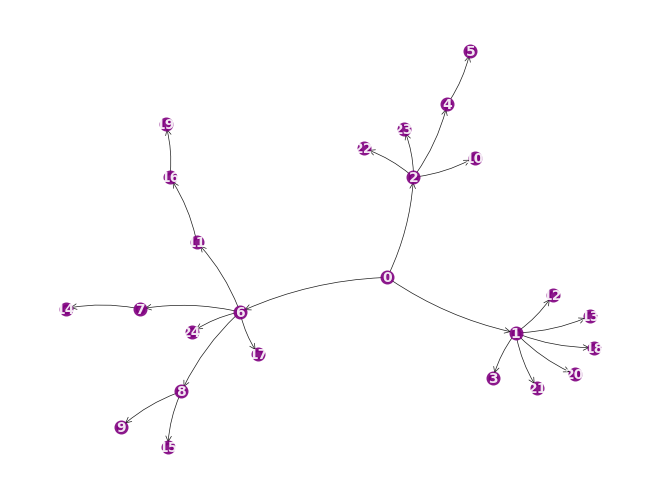

In [3]:
G = nx.barabasi_albert_graph(25,1)
# Nodos color morado y tamaño de salida 10x10
nx.draw(G, node_color='purple', 
        node_size=50, 
        with_labels=True, 
        font_weight='bold', 
        font_color='white', 
        font_size=10, 
        pos=nx.spring_layout(G), 
        width=0.5,
        edge_color='black', 
        arrows=True, 
        arrowsize=10, 
        arrowstyle='->', 
        connectionstyle='arc3, rad = 0.1',
        alpha=0.9,
        linewidths=3,
        # style='dashed',
        node_shape='o',
        )

In [3]:
np.random.choice(G)

10

In [4]:
inicial = np.random.choice(G)
nx.neighbors(G,inicial)
G[inicial]

AtlasView({1: {}})

In [5]:
inicial = np.random.choice(G)
estado = inicial
print('inicial = ',inicial)
for i in range(10):
    estado = np.random.choice(G[estado])
    print('estado = ',estado)

inicial =  9
estado =  8
estado =  9
estado =  8
estado =  9
estado =  8
estado =  9
estado =  8
estado =  17
estado =  8
estado =  9


inicial =  1
estado =  7
estado =  1
estado =  7
estado =  1
estado =  13
estado =  1
estado =  18
estado =  20
estado =  18
estado =  20
estado =  18
estado =  20
estado =  18
estado =  20
estado =  18
estado =  20
estado =  18
estado =  1
estado =  8
estado =  17
estado =  8
estado =  17
estado =  8
estado =  17
estado =  8


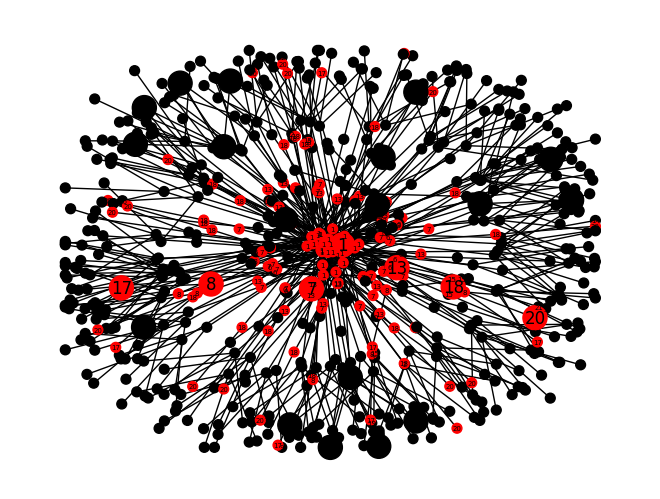

In [8]:
inicial = np.random.choice(G)
estado = inicial
print('inicial = ',inicial)
color = ['k' for nodo in G]
for i in range(25):
    estado = np.random.choice(G[estado])
    print('estado = ',estado)
# Para cada nodo en el grafo, le asignamos un color
    color[estado] = 'r'
# Dibujamos el grafo
    nx.draw(G, node_color=color,
            with_labels = True,
            font_size = 5,
            node_size = 50,
            )
# Guardamos cada grafo que se vaya generando
    plt.savefig('img'+str(i)+'.png')
# Dibujamos el grafo final
nx.draw(G, node_color=color,with_labels = True)

In [10]:
# Hacemos un gif de las imagenes guardadas
import imageio
images = []
for i in range(25):
    images.append(imageio.imread('img'+str(i)+'.png'))
imageio.mimsave('caminata.gif', images)

C:\Users\pepe2\AppData\Local\Temp\ipykernel_19520\1206645938.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('img'+str(i)+'.png'))


In [ ]:
color

['r',
 'r',
 'k',
 'r',
 'r',
 'k',
 'r',
 'r',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k']

In [ ]:
pos = nx.draw(G, node_color=color,with_labels = True)

In [ ]:
visitas = {nodo:0 for nodo in G}
inicial = np.random.choice(G)
estado = inicial
print('inicial = ',estado)
visitas[estado] += 1
colores = [visitas[nodo] for nodo in G]
j = 0

for i in range(1000):
    j+=1
    estado = np.random.choice(G[estado])
    visitas[estado] += 1
    colores = [visitas[nodo] for nodo in G]
    nx.draw(G, node_color=colores,with_labels = True,pos = pos,cmap ='hot',edgecolors='black')
    # plt.savefig('img'+str(j)+'.png')
    plt.show()

# Tiempo promedio de la primera visita

In [5]:

inicial = 10
objetivo = 9
estado = inicial
j = 0

while True:
    j+=1
    estado = np.random.choice(G[estado])
    if estado == objetivo: break
    

In [6]:
j

49

c:\Users\pepe2\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


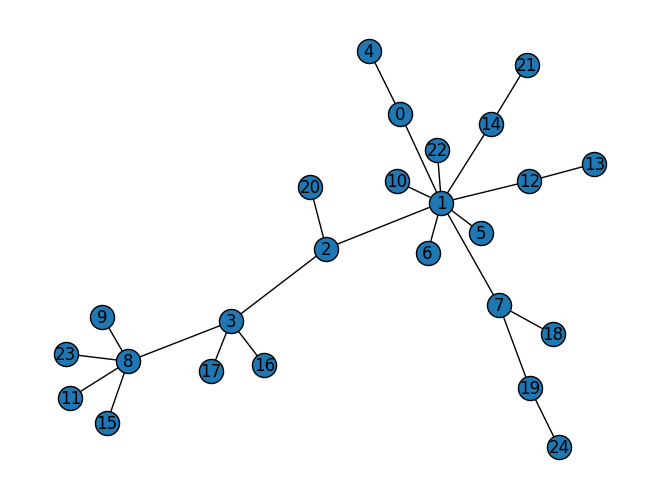

In [10]:
nx.draw(G,with_labels = True,cmap ='hot',edgecolors='black')

# Tiempo promedio de recurrencia

In [4]:
from tqdm import tqdm

# inicial = 10
# objetivo = 18

T = np.zeros([len(G),len(G)])

for inicial in G:
    for objetivo in G:
        tiempos = []

        for i in tqdm(range(100)):
            estado = inicial
            t = 0
            while True:
                t+=1
                estado = np.random.choice(G[estado])
                if estado == objetivo: break
            tiempos.append(t)
        T[inicial,objetivo] = np.mean(tiempos)

100%|██████████| 100/100 [00:00<00:00, 803.62it/s]


In [5]:
T

array([[ 15.14,  43.26,  38.42,  81.  ,  79.1 , 112.52,  26.2 ,  77.24,
         60.84, 131.72,  98.3 ,  67.18,  82.16,  87.4 , 114.2 , 120.56,
        105.  ,  74.48,  59.78, 168.34,  86.18,  87.54,  82.3 ,  85.74,
         79.9 ],
       [ 12.86,   5.66,  50.68,  43.24,  84.8 , 139.76,  42.58,  87.44,
         78.42, 119.6 ,  88.84,  96.32,  51.32,  49.26, 126.46, 118.96,
        127.44,  80.06,  50.24, 194.34,  56.96,  43.52,  96.78,  98.4 ,
         86.52],
       [ 13.06,  51.7 ,  12.08,  86.88,  47.4 , 100.98,  36.64,  85.36,
         76.42, 119.44,  45.64,  78.6 , 100.1 ,  96.38, 125.68, 144.38,
        132.4 ,  91.26,  87.14, 186.4 ,  94.22,  94.86,  60.32,  43.72,
         81.36],
       [ 13.52,   1.  ,  54.02,  53.38,  80.34, 151.04,  40.62,  80.1 ,
         82.94, 128.5 ,  93.08,  78.3 ,  49.76,  49.3 , 139.84, 153.12,
        139.4 , 101.54,  48.24, 176.76,  55.5 ,  42.26, 100.26,  96.18,
         83.94],
       [ 13.64,  41.44,   3.08, 104.58,  28.92,  38.38,  39.8 , 102.

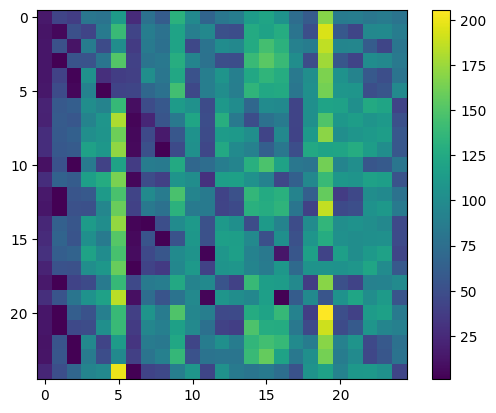

In [6]:
plt.imshow(T)
plt.colorbar()

In [7]:
np.zeros([5,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
np.mean(tiempos)

43.8

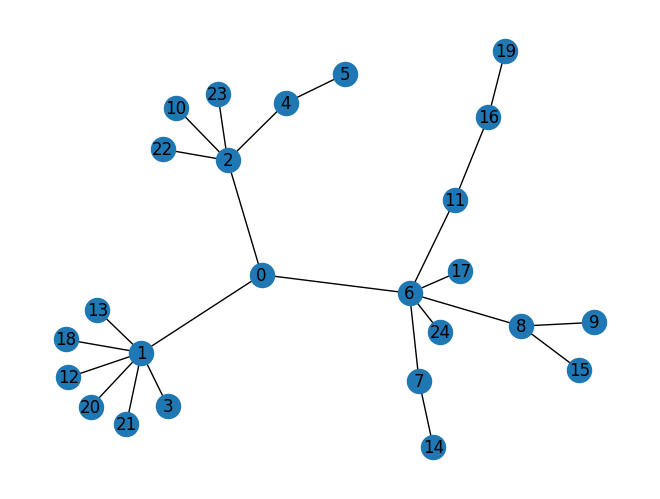

In [9]:
nx.draw(G,with_labels = True)

Todo esto no es simétrico. Se podrá apreciar en nuestra gráfica que el hecho de que algunos nodos tengan la posibilidad de que se llegue a uno y otro de manera más rápida que otros.

In [10]:
T.mean(axis = 0)

array([ 18.66  ,  40.2696,  43.9928,  86.116 ,  83.7288, 138.5712,
        24.0896,  68.0128,  62.0752, 109.8656,  89.2496,  63.38  ,
        89.528 ,  83.5168, 111.0312, 110.7344, 103.0688,  72.1448,
        84.7504, 149.5736,  87.7856,  88.828 ,  93.576 ,  92.4768,
        69.464 ])

# Centralidad de caminata aleatoria

In [11]:
# Cuanto tiempos nos tardamos de llegar de un nodo a otro 
T.mean(axis = 0)**(-1.)

array([0.05359057, 0.02483263, 0.02273099, 0.01161224, 0.01194332,
       0.00721651, 0.04151169, 0.01470311, 0.01610949, 0.00910203,
       0.01120453, 0.01577785, 0.01116969, 0.01197364, 0.00900648,
       0.00903062, 0.00970226, 0.01386101, 0.01179935, 0.00668567,
       0.01139139, 0.01125771, 0.0106865 , 0.01081352, 0.01439595])

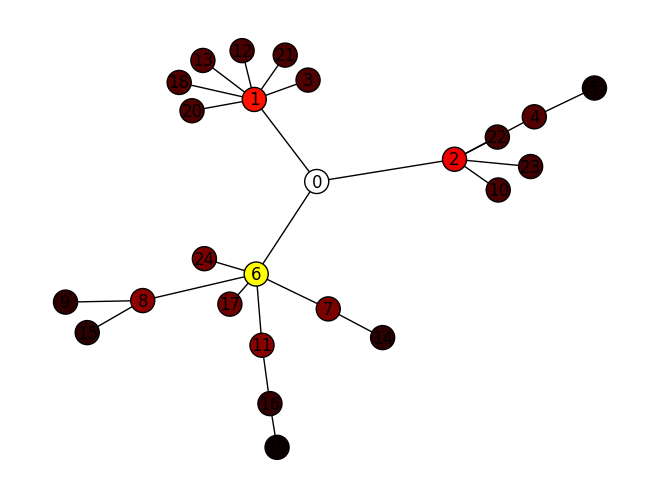

In [12]:
colores = T.mean(axis = 0)**(-1.)
nx.draw(G,with_labels = True,node_color = colores,cmap ='hot',edgecolors='black')